# Movie Review Sentiment Analysis

[AITS Cainvas Community](https://discord.gg/x6xn39u)

In [1]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=848cca886e02befad4a1dc0caa7e4773a5b970aaefaafb96c8f3b4e824faa6f6
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


## Import modules


In [2]:
import pandas as pd
import numpy as np
import wget
import os

In [3]:
import tensorflow as tf
keras = tf.keras
tf.__version__

'2.6.0'

## Dataset

In [4]:
url = "https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/Movie.zip"
file = wget.download(url)

In [5]:
import zipfile
data = zipfile.ZipFile(file, 'r')
data.extractall("Movie Reviews")

## Data Expolorations

In [6]:
train_data = pd.read_csv("Movie Reviews/Movie/train1.tsv", sep='\t')

train_data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


## Text preprocessing

In [7]:
split_size = int(len(train_data) * 0.8)

total_phrases = train_data.Phrase.to_numpy()
train_phrases = total_phrases[:split_size]
valid_phrases = total_phrases[:split_size]

total_sentiments = train_data.Sentiment.to_numpy()
train_sentiments = total_sentiments[:split_size]
valid_sentiments = total_sentiments[:split_size]

In [8]:
train_ds = tf.data.Dataset.from_tensor_slices((train_phrases, train_sentiments))
valid_ds = tf.data.Dataset.from_tensor_slices((valid_phrases, valid_sentiments))
total_ds = tf.data.Dataset.from_tensor_slices((total_phrases, total_sentiments))

for phrase, sentiment in train_ds.take(4):
    print(phrase, sentiment)
print()
for phrase, sentiment in valid_ds.take(1):
    print(phrase, sentiment)

tf.Tensor(b'A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .', shape=(), dtype=string) tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(b'A series of escapades demonstrating the adage that what is good for the goose', shape=(), dtype=string) tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(b'A series', shape=(), dtype=string) tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(b'A', shape=(), dtype=string) tf.Tensor(2, shape=(), dtype=int64)

tf.Tensor(b'A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .', shape=(), dtype=string) tf.Tensor(1, shape=(), dtype=int64)


In [9]:
word_set = set()
lines = []

for line, _ in train_ds:
    line = line.numpy().decode("utf-8")
    lines.append(line)
    for w in line.split(" "):
        word_set.add(w)

print(len(word_set))
for index, w in enumerate(word_set):
    if index >= 10:
        break
    print(f"{index:3}: {w}")

16007
  0: 
  1: radiant
  2: slurs
  3: Bazadona
  4: Aggressive
  5: destruction
  6: bank
  7: ne
  8: terrible
  9: fiery


In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
vocab_size = 5000
tokenizer = Tokenizer(num_words= vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(lines)

word_index = tokenizer.word_index
for index, (a, b) in enumerate(word_index.items()):
    if index >= 5:
        break
    print(a, b)

<OOV> 1
the 2
a 3
of 4
and 5


In [11]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [12]:
reverse_word_index

{1: '<OOV>',
 2: 'the',
 3: 'a',
 4: 'of',
 5: 'and',
 6: 'to',
 7: "'s",
 8: 'in',
 9: 'is',
 10: 'that',
 11: 'it',
 12: 'as',
 13: 'with',
 14: 'for',
 15: 'its',
 16: 'film',
 17: 'an',
 18: 'movie',
 19: 'this',
 20: 'but',
 21: 'on',
 22: 'be',
 23: 'you',
 24: 'more',
 25: 'by',
 26: 'his',
 27: "n't",
 28: 'one',
 29: 'about',
 30: 'than',
 31: 'not',
 32: 'at',
 33: 'all',
 34: 'from',
 35: 'or',
 36: 'are',
 37: 'like',
 38: 'have',
 39: 'so',
 40: "'",
 41: 'has',
 42: 'out',
 43: 'story',
 44: 'rrb',
 45: 'who',
 46: 'good',
 47: 'up',
 48: 'most',
 49: 'lrb',
 50: 'too',
 51: 'into',
 52: 'what',
 53: 'characters',
 54: 'their',
 55: 'much',
 56: 'comedy',
 57: 'your',
 58: 'if',
 59: 'life',
 60: 'i',
 61: "''",
 62: 'just',
 63: 'can',
 64: 'time',
 65: 'some',
 66: 'no',
 67: 'does',
 68: 'well',
 69: 'funny',
 70: 'even',
 71: 'way',
 72: 'little',
 73: 'make',
 74: 'very',
 75: 'any',
 76: 'will',
 77: 'only',
 78: 'movies',
 79: 'which',
 80: 'love',
 81: 'director',

In [13]:
for line in lines:
    print(line)
    sequences = tokenizer.texts_to_sequences([line])[0]
    print(sequences)
    print([f"{id}: {reverse_word_index[id]}" for id in sequences])
    break

A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .
[3, 318, 4, 1, 1, 2, 1, 10, 52, 9, 46, 14, 2, 2413, 9, 179, 46, 14, 2, 1, 65, 4, 79, 597, 1, 20, 516, 4, 79, 2293, 6, 55, 4, 3, 43]
['3: a', '318: series', '4: of', '1: <OOV>', '1: <OOV>', '2: the', '1: <OOV>', '10: that', '52: what', '9: is', '46: good', '14: for', '2: the', '2413: goose', '9: is', '179: also', '46: good', '14: for', '2: the', '1: <OOV>', '65: some', '4: of', '79: which', '597: occasionally', '1: <OOV>', '20: but', '516: none', '4: of', '79: which', '2293: amounts', '6: to', '55: much', '4: of', '3: a', '43: story']


In [14]:
sequences = tokenizer.texts_to_sequences(lines[:30])
np.max(list(map(len, sequences)))
maxlen = 50

In [15]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

def pad_f(sequences):
    return pad_sequences(sequences, maxlen=maxlen, padding='post', truncating='post')

In [16]:
batch_size = 16

def tokenize_and_pad_sequence(text_batch):
    texts = map(lambda t: t.numpy().decode("utf-8"), text_batch)
    sequences = tokenizer.texts_to_sequences(texts)
    return pad_f(sequences)

@tf.function
def encode_text_batch(text_batch):
    return tf.py_function(
        func = tokenize_and_pad_sequence,
        inp = [text_batch],
        Tout = tf.int32
    )

def create_batch_ds_inner(ds):
    ds = ds.batch(batch_size)
    ds = ds.map(lambda text_batch, label_batch: (encode_text_batch(text_batch), label_batch))
    return ds.cache()

def create_batch_ds(ds, do_shuffle=True):
    ds = create_batch_ds_inner(ds)
    if do_shuffle:
        ds = ds.shuffle(100)
    return ds.prefetch(tf.data.experimental.AUTOTUNE)

for text, _ in train_ds:
    print(text)
    break

train_batch_ds = create_batch_ds(train_ds)
valid_batch_ds = create_batch_ds(valid_ds, do_shuffle=False)
total_batch_ds = create_batch_ds(total_ds, do_shuffle=False)

for text_batch, label_batch in create_batch_ds(train_ds, do_shuffle=False).take(1):
    print(label_batch.shape)
    print(text_batch.shape)
    print(text_batch[0])
    for index in text_batch[0]:
        index = index.numpy()
        if index > 0:
            print(f"{index}: {reverse_word_index[index]}")

tf.Tensor(b'A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .', shape=(), dtype=string)
(16,)
(16, 50)
tf.Tensor(
[   3  318    4    1    1    2    1   10   52    9   46   14    2 2413
    9  179   46   14    2    1   65    4   79  597    1   20  516    4
   79 2293    6   55    4    3   43    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0], shape=(50,), dtype=int32)
3: a
318: series
4: of
1: <OOV>
1: <OOV>
2: the
1: <OOV>
10: that
52: what
9: is
46: good
14: for
2: the
2413: goose
9: is
179: also
46: good
14: for
2: the
1: <OOV>
65: some
4: of
79: which
597: occasionally
1: <OOV>
20: but
516: none
4: of
79: which
2293: amounts
6: to
55: much
4: of
3: a
43: story


## Graph for analysis

In [17]:
import matplotlib.pyplot as plt

In [18]:
def plot_item(history_df, colname = 'loss', f = np.min, ax = None):
    val_colname = f"val_{colname}"
    print(f"{colname}: {f(history_df[colname]):.4f} - {val_colname}: {f(history_df[val_colname]):.4f}")
    history_df.loc[:, [colname, val_colname]].plot(title = colname.capitalize(), ax=ax)


def show_history(history):
    history_df = pd.DataFrame(history.history)

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    plot_item(history_df, 'loss', ax = axes[0])
    plot_item(history_df, 'accuracy', ax = axes[1], f = np.max)

## Model

In [19]:
def fit_model(model, train_batch_ds = train_batch_ds, epochs=15, patience=2):
    model.compile(
        optimizer = 'adam',
        loss = keras.losses.SparseCategoricalCrossentropy(from_logits= True),
        metrics = ['accuracy']
    )

    early_stopping = keras.callbacks.EarlyStopping(
        patience=patience,
        restore_best_weights=True
    )

    history = model.fit(
        train_batch_ds,
         validation_data = valid_batch_ds,
         epochs = epochs,
         callbacks = [early_stopping]
    )

    return history

In [20]:
embedding_dim = 20
model_lstm_bi = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=maxlen),
    keras.layers.Bidirectional(keras.layers.LSTM(embedding_dim)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64)
])

model_lstm_bi.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 20)            100000    
_________________________________________________________________
bidirectional (Bidirectional (None, 40)                6560      
_________________________________________________________________
dense (Dense)                (None, 512)               20992     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
Total params: 201,472
Trainable params: 201,472
Non-trainable params: 0
_________________________________________________________________


In [21]:
history_lstm_bi = fit_model(model_lstm_bi, patience=5)
history_lstm_bi

Epoch 1/15
7803/7803 [==============================] - 251s 31ms/step - loss: 1.0994 - accuracy: 0.5659 - val_loss: 0.9241 - val_accuracy: 0.6201
Epoch 2/15
7803/7803 [==============================] - 214s 27ms/step - loss: 0.9190 - accuracy: 0.6290 - val_loss: 0.8553 - val_accuracy: 0.6484
Epoch 3/15
7803/7803 [==============================] - 214s 27ms/step - loss: 0.8609 - accuracy: 0.6504 - val_loss: 0.7990 - val_accuracy: 0.6747
Epoch 4/15
7803/7803 [==============================] - 214s 27ms/step - loss: 0.8192 - accuracy: 0.6681 - val_loss: 0.7689 - val_accuracy: 0.6876
Epoch 5/15
7803/7803 [==============================] - 214s 27ms/step - loss: 0.7864 - accuracy: 0.6816 - val_loss: 0.7576 - val_accuracy: 0.6912
Epoch 6/15
7803/7803 [==============================] - 214s 27ms/step - loss: 0.7597 - accuracy: 0.6917 - val_loss: 0.7286 - val_accuracy: 0.7026
Epoch 7/15
7803/7803 [==============================] - 213s 27ms/step - loss: 0.7369 - accuracy: 0.7003 - val_loss: 0

loss: 0.6156 - val_loss: 0.6420
accuracy: 0.7496 - val_accuracy: 0.7368


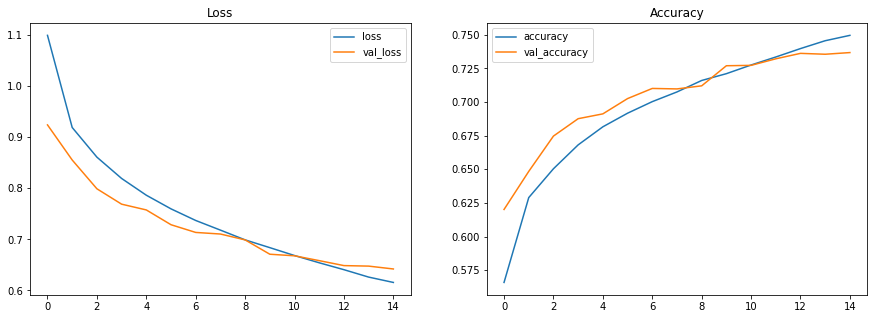

In [22]:
show_history(history_lstm_bi)

In [23]:
model_lstm_multiple_bi = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=maxlen),
    keras.layers.Bidirectional(keras.layers.LSTM(embedding_dim, return_sequences=True)),
    keras.layers.Bidirectional(keras.layers.LSTM(embedding_dim)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64)
])

model_lstm_multiple_bi.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f105778f590>>

Epoch 1/15
7803/7803 [==============================] - 484s 61ms/step - loss: 1.1194 - accuracy: 0.5599 - val_loss: 0.9416 - val_accuracy: 0.6222
Epoch 2/15
7803/7803 [==============================] - 475s 61ms/step - loss: 0.9275 - accuracy: 0.6257 - val_loss: 0.8574 - val_accuracy: 0.6510
Epoch 3/15
7803/7803 [==============================] - 476s 61ms/step - loss: 0.8706 - accuracy: 0.6489 - val_loss: 0.8294 - val_accuracy: 0.6655
Epoch 4/15
7803/7803 [==============================] - 476s 61ms/step - loss: 0.8304 - accuracy: 0.6651 - val_loss: 0.7870 - val_accuracy: 0.6817
Epoch 5/15
7803/7803 [==============================] - 476s 61ms/step - loss: 0.7979 - accuracy: 0.6763 - val_loss: 0.7531 - val_accuracy: 0.6936
Epoch 6/15
7803/7803 [==============================] - 473s 61ms/step - loss: 0.7695 - accuracy: 0.6876 - val_loss: 0.7308 - val_accuracy: 0.7030
Epoch 7/15
7803/7803 [==============================] - 475s 61ms/step - loss: 0.7482 - accuracy: 0.6966 - val_loss: 0

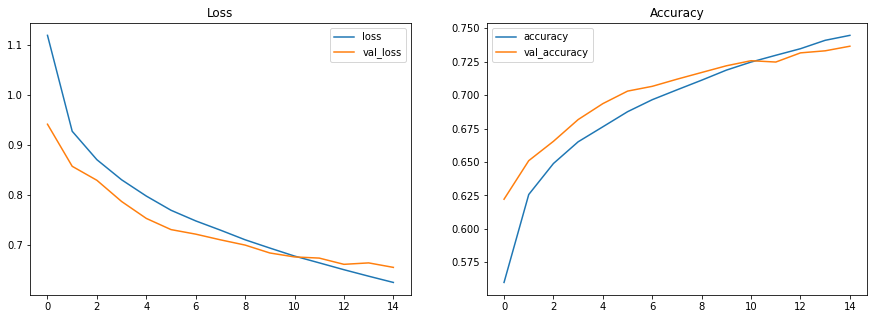

In [24]:
history_lstm_multiple_bi = fit_model(model_lstm_multiple_bi, patience=5)
show_history(history_lstm_multiple_bi)